In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats as stats

### Задание 1

1. Импортируйте файл «Данные для ДЗ 5 Корреляции.csv».
2. Постройте гистограммы распределения для рядов PHYSICS и BLOOD и сделайте визуальный вывод о нормальности распределения данных.
3. Постройте scatterplot этих двух величин и сделайте визуальный вывод о корреляции между ними.
4. Создайте функцию **proxi_ranges**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию равно 5%).
Данная функция выполняет следующие действия:
    - Вычисляет дисперсии рядов и их ковариацию с помощью функции cov из numpy и принтит эти результаты в user-friendly манере.
    - Вычисляет корреляцию Пирсона и корреляцию Спирмена и p_value этих корреляций.
    - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше альфы. В противном случае принтит, является ли корреляция слабой (меньше 0.3), средней (от 0.3 до 0.7) или сильной (больше 0.7) (для обеих корреляций).
    - Функция не обладает return.
5. Примените эту функцию к рядам PHYSICS и BLOOD из csv-файла.

In [17]:
df = pd.read_csv('Данные для дз5 Корреляции.csv', sep = ';')
df

,PHYSICS,BLOOD
0,48,132
1,138,52
2,156,77
3,167,64
4,105,89
...,...,...
1430,174,52
1431,6,135
1432,131,58
1433,133,72


In [ ]:
# sns.set(rc={'figure.figsize':(5,5)})
# ax1 = sns.histplot(df['PHYSICS'], color='blue')
# plt.show(ax1)
# ax2 = sns.histplot(df['BLOOD'], color='orange')
# plt.show(ax2)

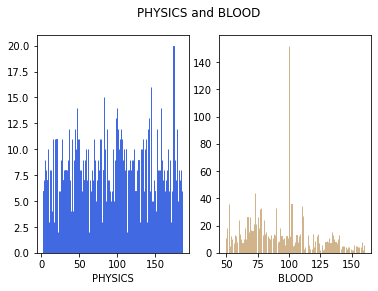

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PHYSICS and BLOOD')
ax1.hist(df['PHYSICS'], bins=1435, histtype='bar', ec='royalblue') 
ax2.hist(df['BLOOD'], bins=1435, histtype='bar', ec='tan') 
ax1.set_xlabel("PHYSICS")
ax2.set_xlabel("BLOOD")
plt.show()

На основе визуального анализа, можно предположить, что гистограмма ряда PHYSICS распределена не нормально, гистограмма ряда BLOOD распределена также не нормально, но это может быть связано с выбросами.

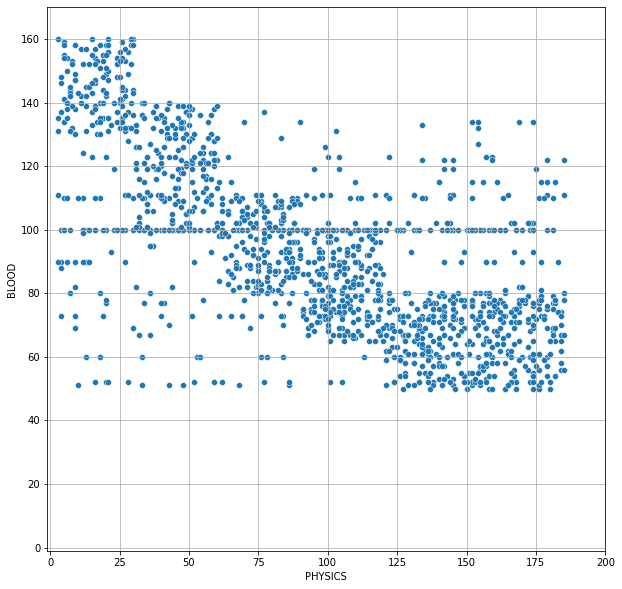

In [15]:
plt.figure(figsize=(10, 10)) 

plt.xlim(-1, 200) # минусовое значение, чтобы не отрезать 0
plt.ylim(-1, 170)



sns.scatterplot(data=df, 
                x="PHYSICS", 
                y="BLOOD",
               )
plt.grid()

На основе визуального анализа, можно предположить, что существует отрицательная корреляция между рядами PHYSICS и BLOOD, а также некоторое количество выбросов.

In [88]:
r1 = df['PHYSICS']
r2 = df['BLOOD']

def proxi_ranges(r1, r2, alpha=0.05):
    var_r1 = np.var(r1)
    var_r2 = np.var(r2)    
    cov_r1 = np.cov(r1)
    cov_r2 = np.cov(r2)
    corrcoef_array = np.corrcoef(r1, r2)
    corrcoef = corrcoef_array[0][1]
    spearmanr, pvalue = stats.spearmanr(r1, r2)

#     print(var_r1)
#     print(var_r2)
#     print(cov_r1)
#     print(cov_r2)
#     print(corrcoef)  
#     print(spearmanr)
#     print(pvalue)

    print('Корреляция Пирсона:')
    if (pvalue > alpha):
        print('Корреляция равна нулю')
    else:
        if ((corrcoef) < 0):
            print('Кореляция отрицательная')
        if (abs(corrcoef) < 0.3):
            print ('Корреляция слабая')
        elif (abs(corrcoef) < 0.7):
            print ('Корреляция средняя')
        elif (abs(corrcoef) > 0.7):        
            print ('Корреляция сильная')
            
    print(' ')
    print('Корреляция Спирмена:')
    if (pvalue > alpha):
        print('Корреляция равна нулю')
    else:
        if ((spearmanr) < 0):
            print('Кореляция отрицательная')
        if (abs(spearmanr) < 0.3):
            print ('Корреляция слабая')
        elif (abs(spearmanr) < 0.7):
            print ('Корреляция средняя')
        elif (abs(spearmanr) > 0.7):        
            print ('Корреляция сильная')
            
proxi_ranges(r1, r2)

Корреляция Пирсона:
Кореляция отрицательная
Корреляция средняя
 
Корреляция Спирмена:
Кореляция отрицательная
Корреляция средняя


### Задание 2

1. Импортируйте файл «Данные для ДЗ 5 Манн-Уитни.csv».
2. Постройте гистограмму рядов BLOOD1 и BLOOD2.
3. Создайте функцию **mann_whitney_func**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию равно 5%).
Данная функция выполняет следующие действия:
    - Возвращает (в return) — значение статистики Манна — Уитни и p_value нулевой гипотезы.
    - Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
4. Примените эту функцию к рядам BLOOD1 и BLOOD2 из csv-файла.
5. Примените к этим рядам также t-test для сравнения средних.

In [90]:
df1 = pd.read_csv('Данные для дз5 Манн-Уитни.csv', sep = ';')
df1

,BLOOD1,BLOOD2
0,66,140.0
1,92,140.0
2,75,78.0
3,98,79.0
4,84,80.0
...,...,...
684,81,NaN
685,121,NaN
686,98,NaN
687,96,NaN


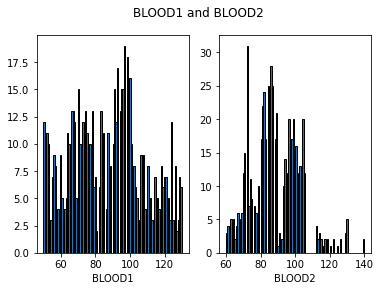

In [99]:
fig, (ax11, ax22) = plt.subplots(1, 2)
fig.suptitle('BLOOD1 and BLOOD2')
ax11.hist(df1['BLOOD1'], bins=100, histtype='bar', ec='k') 
ax22.hist(df1['BLOOD2'], bins=100, histtype='bar', ec='k') 
ax11.set_xlabel("BLOOD1")
ax22.set_xlabel("BLOOD2")
plt.show()

In [120]:
df1 = df1.dropna()

def mann_whitney_func(r1, r2, alpha=0.05):
#     mannwhitney, pvalue = stats.mannwhitneyu(r1, r2)    
#     mannwhitney, pvalue = stats.mannwhitneyu(r1, r2 , alternative = 'greater')
    mannwhitney, pvalue = stats.mannwhitneyu(r1, r2 , alternative = 'less')
#     print(mannwhitney, pvalue)
    
    if (pvalue > alpha):
        print('Распределения равны')
    else:
        print('Распределения не равны')
    
mann_whitney_func(df1['BLOOD1'], df1['BLOOD2'])

178857.0 0.24705789854836258
Распределения равны


5. Примените к этим рядам также t-test для сравнения средних.

In [123]:
statistic,pvalue = stats.ttest_ind(df1['BLOOD1'], df1['BLOOD2'])
alpha=0.05

if (pvalue > alpha):
    print('Средние распределений равны')
else:
    print('Средние распределений не равны')

ttest

Средние распределений равны


Ttest_indResult(statistic=-0.6398988386814893, pvalue=0.5223597081606046)